# IAPWS-IF97 Industrial Formulation for the Thermodynamic Properties of Water and Steam

Introduced by International Association for the Properties of Water and Steam. This formulation is recommended for industrial use (primarily the steam power industry) for the calculation of thermodynamic properties of ordinary water in its fluid phases, including vapor-liquid equilibrium. 

For ease of discussion, process engineer called this steam table. This notebook is intended to demonstrate the use python library for this standard (instead of building it from scratch since the equation is hard as ****).

We will be using iapws official library

In [1]:
#install the package from iapws
!pip install iapws

## Findings saturated temperature given pressure

The most common use of steam table is to find saturated temperature given pressure. IAPWS is using international units such as Kelvin for temperature and MegaPascal for pressure. We normally use kg/cm2 or bar for pressure and degC for temperature. Therefore we must first convert before inputting it into the function

In [52]:
#create functions to convert pressure to MPa (megapascal) given value and unit

def convert_pressure(pressure, unit=None):
    '''
    A conversion pressure function using typical pressure unit used in the industry. 
    Currently taking in bar, torr, mmHg, atm, psia, and kg/cm2 and convert it to Mpa 
    for usage in iapws module
    '''
    if unit is None:
        unit = 'bar'
    if unit == 'bar':
        pressure = pressure / 10
    elif unit == 'torr':
        pressure = pressure / 7501
    elif unit == 'mmHg':
        pressure = pressure / 7501
    elif unit == 'atm':
        pressure = pressure / 9.869
    elif unit == 'psia':
        pressure = pressure * 0.00689476
    elif unit == 'kg/cm2':
        pressure = pressure * 0.09807
    elif unit == 'kg/cm2g':
        pressure = pressure * 0.1994
    elif unit == 'barg':
        pressure = pressure * 0.2013
    elif unit == 'pa':
        pressure = pressure * 1e-6

    return pressure


In [53]:
#test the pressure conversion

P = 42

p_convert = convert_pressure(P,'pa')
p_convert

4.2e-05

In [29]:
#now the pressure conversion works, let's input it into our iawps
from iapws import iapws97 as steamtable



Tsat = steamtable._TSat_P(3)

Tsat


507.0084450062522

In [32]:
#let's create a function pipeline

def get_saturated_temp(pressure):
    from iapws import iapws97 as steamtable
    
    tsat = steamtable._TSat_P(pressure)

    return tsat-273.15
    

In [47]:
#let's try

P = 50
unit = 'kg/cm2'

p_convert = convert_pressure (P,unit)
Tsat = get_saturated_temp(p_convert)
Tsat

262.7276934228182

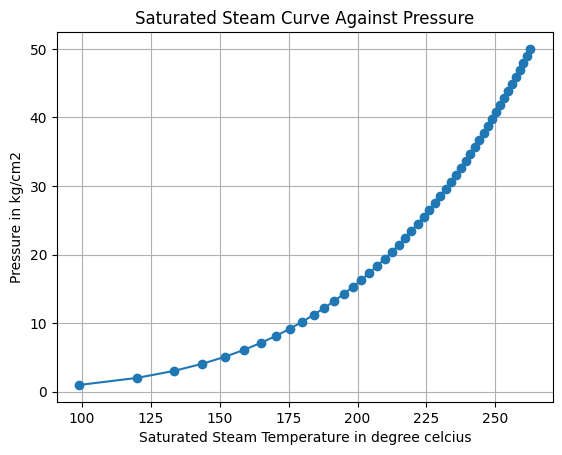

In [51]:
#let's iterate and create a plot based on pressure.
#given pressure range from 1-50 bar, let's plot on pressure and temperature
import numpy as np
import matplotlib.pyplot as plt


# Define the range of pressure values over which to iterate
min_pressure = 1
max_pressure = 50
num_points = 49
pressure_range = np.linspace(min_pressure, max_pressure, num_points)
unit = 'kg/cm2'

# Iterate over each pressure value
pressure_values = []
temperature_values = []
for pressure in pressure_range:
    # Apply the conversion function to calculate temperature
    p_convert = convert_pressure(pressure,unit)
    temperature = get_saturated_temp(p_convert)
    # Store the pressure and temperature values
    pressure_values.append(pressure)
    temperature_values.append(temperature)

# Plot the temperature values against the pressure values
plt.plot(temperature_values,pressure_values, marker='o', linestyle='-')
plt.xlabel('Saturated Steam Temperature in degree celcius')
plt.ylabel('Pressure in kg/cm2')
plt.title('Saturated Steam Curve Against Pressure')
plt.grid(True)
plt.show()

Now it seems like our experiment works, we manage to convert pressure to Mpa and input it into IAPWS steam table. Now it's time for us to convert this into a web application by utilizing streamlit